<a href="https://colab.research.google.com/github/RubenQuispe/Machine-Learning-con-Python-001/blob/master/Lab_14_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering
### MSc. Rubén Quispe
# Introduccón
Existen muchos modelos para la clustering. En este notebook les presentamos el modelo que se considera más simple entre ellos. A pesar de su simplicidad K-Means se utiliza ampliamente para la agrupación en clusteres en muchas aplicaciones de data science, lo que es especialmente util si necesitas descubrir rápidamente información a partir de datos sin etiquetar.En este notebook aprenderas a usar K_means para segmentación de clientes.

Algunas aplicaciones de k-means en el mundo real
1. Custumer segmentation
2. Comprender lo que los visitantes a un sitio web intentan lograr
4. Patter recognition
5. Machine Learning
6. Data compression

En este notebook practicamos el clustering K_Means con 2 ejemplos.

* K-means en un dataset generados aleatoriamente 
* Usando K-means para la segmentación de clientes 
# Tabla de contenidos

* K_Means en un dataset generado aleatoriamente
1. Configuración de k_means
2. Creación del gráfico para la visualización
* Segmentación de clientes con K_means
1. Pre-procesamiento
2. Modelado
3. Insights

# 1. Importar las librerías necesarias

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# K_Means en un dataset generado aleatoriamente
creamos nuestro propio dataset para este lab.
Primero necesitmos configurar una seed aleatoria. Usamos la función numpy random.seed(), donde seed se establecerá en 0 

In [2]:
np.random.seed(0)

Acontenuación creamos grupos aleatorios de puntos utilizando la clase make_blobs. La clase make_blobs puede tomar muchas entradas pero usaremos estas especificas.

__<u> Input</u>__
* n_samples: El número total de puntos divididos equitativamente entre los grupos
<ul>* El valor será: 5000</ul>
* Centros: El número de centros a generar o las ubicaciónes de los centros fijos.
<ul>* El valor será: [[4,4], [-2,-1],[2,-3],[1,1]] </ul>
* cluster_std: La desviación estandar de cluster
<ul>* El valor será: 0.9 </ul>

__<U>Output</u>__
* X: Array of shape[n_samples].(Feature Matrix)
<ul> * Las muetras generadas </ul>
* y: Array of shape[n_samples].(Response vector)
<ul> * Las etiquetas enteras para la pertenencia al cluster de cada muestra






In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4],[-2,-1], [2,-3],[1,1]], cluster_std=0.9)

vamos a mostrar el diagramao o gráficos de los datos generados aleatoriamente

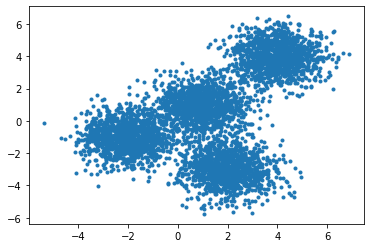

In [4]:
plt.scatter(X[:,0],X[:,1], marker='.')

# Configurando K-Means
Ahora que tenemos nuestros datos aleatorios, configuremos nuestro K-means.

La clase K-means tiene muchos parametros que se puede usar, pero usaremos estas 3.

* init: Metodo de inicialización de los centroides
<ul>
<li> El valor será:K-means++</li>
<li> K-means++: selecciona los centros iniciales de clustering  de k-mean de una manera inteligente para acelerar la convergencia.</li>
</ul>
* n_clusters: El número de cluster que se formara así como el número de centroides que se genera.
<ul>* El valor será: 4(ya que tenemos 4 centros)</ul>
* n_init: Números de veces que se ejecutará el algoritmo k-means con diferentes seeds (semillas) de centroide. Los resultados finales serán la mejor salida de n_init xorridas consecutivas en terminos de inercia.
<ul>* El valor será: 12 </UL>

Inicializamos K-Means con estos parametros, donde el parametro de salida se llama K-means


In [5]:
k_means =KMeans(init ='k-means++', n_clusters=4,n_init=12)

Ahora ajustamos el modelo de k_means con la matriz de caracteristicas que creamos arriba 

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Ahora tomemos etiquetas para cada punto en el modelo usando el atributo .label_ dek-meansy guradelo como k_means_labels

In [7]:
k_means_labels=k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

También obtendremos las coordenadas de los centros de k-means usando .cluster_centers_ de KMeans y las guardaremos como k_means_cluster_centers

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

# Creación de la figura visual
Entonces, ahora que tenemos los datos aleatorios generados y el modelo K-Means inicializado, ¡grafiquemos y veamos cómo se ve! Lea el código y los comentarios para comprender cómo trazar el modelo.

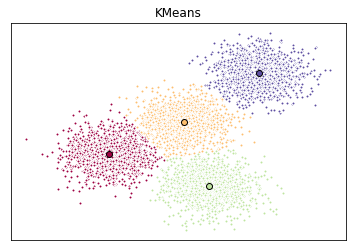

In [10]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# Práctica
Intente agrupar el conjunto de datos anterior en 3 grupos. Aviso: no vuelva a generar datos, use el mismo conjunto de datos que el anterior

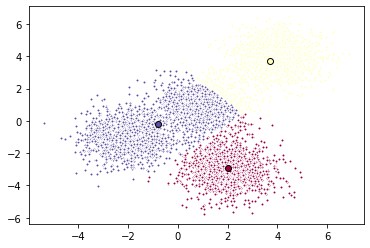

In [11]:
# tu codigo
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

# Segmentación de clientes con K-Means
Imagine que tiene un conjunto de datos de clientes y necesita aplicar la segmentación de clientes en estos datos históricos. La segmentación de clientes es la práctica de dividir una base de clientes en grupos de personas que tienen características similares. Es una estrategia importante, ya que una empresa puede dirigirse a estos grupos específicos de clientes y asignar eficazmente los recursos de marketing. Por ejemplo, un grupo puede contener clientes con altos beneficios y bajo riesgo, es decir, más propensos a comprar productos o suscribirse a un servicio. Una tarea empresarial es retener a esos clientes. Otro grupo podría incluir clientes de organizaciones sin fines de lucro. Y así


# Cargar el data 

In [12]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


# Preprocesamiento
Como puede ver, la Dirección en este conjunto de datos es una variable categórica. El algoritmo de k-means no se aplica directamente a las variables categóricas porque la función de distancia euclidiana no es realmente significativa para las variables discretas. Entonces, dejemos esta función y ejecutemos la agrupación en clústeres.

In [13]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


# Normalizando sobre la desviación estándar
Ahora normalicemos el conjunto de datos. Pero, ¿por qué necesitamos la normalización en primer lugar? La normalización es un método estadístico que ayuda a los algoritmos basados en matemáticas a interpretar características con diferentes magnitudes y distribuciones por igual. Usamos StandardScaler () para normalizar nuestro conjunto de datos.

In [15]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

# Modelado
En nuestro ejemplo (si no tuviéramos acceso al algoritmo k-means), sería lo mismo que adivinar que cada grupo de clientes tendría cierta edad, ingresos, educación, etc., con múltiples pruebas y experimentos. Sin embargo, utilizando el agrupamiento de K-means podemos hacer todo este proceso mucho más fácil.

Apliquemos k-means en nuestro conjunto de datos y echemos un vistazo a las etiquetas de los clústeres.

In [16]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

# Insights
 Asignamos las etiquetas a cada fila en el dataframe.

In [17]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


Podemos verificar fácilmente los valores del centroide promediando las características de cada grupo.

In [18]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


Ahora, veamos la distribución de los clientes según su edad e ingresos:

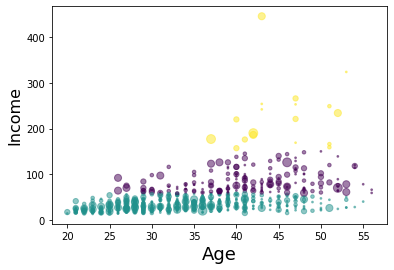

In [19]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

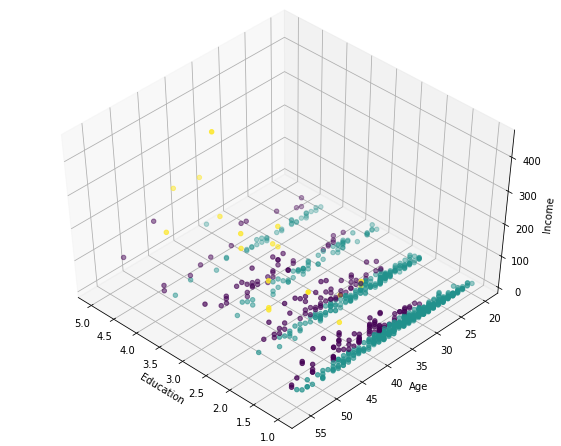

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

k-means dividirá a sus clientes en grupos mutuamente excluyentes, por ejemplo, en 3 grupos. Los clientes de cada grupo son similares demográficamente entre sí. Ahora podemos crear un perfil para cada grupo, considerando las características comunes de cada clúster. Por ejemplo, los 3 grupos pueden ser:

* AFUENTE, EDUCADO Y MAYOR
* INGRESOS MEDIOS E INGRESOS
*JOVEN Y BAJOS INGRESOS

# Muchas gracias 